## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import svm
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import scipy as sp

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.algorithm == 'kd_tree': 
            self.kdtree = KDTree(self.X, leaf_size=2)  # как лучше выбрать leaf_size? 
            
    def predict(self, X):
        if self.algorithm == 'brute':
            part_ord = self.k_nearest_brute(X)
        elif self.algorithm == 'kd_tree':
            part_ord = self.k_nearest_kdtree(X)
        
        answer = np.apply_along_axis(self.bincount_argmax_classes, 1, part_ord)
        
        return answer
    
    def k_nearest_brute(self, X):
        D = sp.spatial.distance.cdist(X, self.X)
        return np.argpartition(D, kth=self.n_neighbors, axis=1)[:, :self.n_neighbors]
        
    def k_nearest_kdtree(self, X):      
        dist, ind = self.kdtree.query(X, k=self.n_neighbors) 
        return ind
    
    def bincount_argmax_classes(self, numbers):
        return np.bincount(self.y[numbers]).argmax()
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%timeit clf.fit(X_train, y_train)

316 µs ± 46.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit my_clf.fit(X_train, y_train)

545 ns ± 16.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
%timeit clf.predict(X_test)

1.53 ms ± 100 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit my_clf.predict(X_test)

244 µs ± 4.62 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%timeit clf.fit(X_train, y_train)

560 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%timeit my_clf.fit(X_train, y_train)

485 µs ± 42.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%timeit clf.predict(X_test)

1.6 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%timeit my_clf.predict(X_test)

432 µs ± 48.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
train_data = newsgroups['data']
train_target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [22]:
def optimal_from(metric, K_values = range(1,11)):
    means = []
    global X_train
    global train_target
    
    for K in K_values:
        clf = KNeighborsClassifier(n_neighbors=K, metric = metric)
        scores = cross_val_score(clf, X_train, train_target, cv=3)
        means.append(scores.mean())
    means = np.asarray(means)
    return means, means.argmax() + 1

In [24]:
vectorizer = CountVectorizer(max_df=0.1, max_features=5_000) 
X_train = vectorizer.fit_transform(train_data).toarray()

In [26]:
scores, best = optimal_from(metric='minkowski')

In [27]:
scores, best

(array([0.28212773, 0.23607923, 0.2309521 , 0.23740453, 0.2378464 ,
        0.23625522, 0.23104007, 0.23033337, 0.22750507, 0.22503018]),
 1)

In [32]:
vectorizer = TfidfVectorizer(max_df=0.1, max_features=5_000)
X_train = vectorizer.fit_transform(train_data).toarray()

In [33]:
scores, best = optimal_from(metric='cosine')

In [54]:
scores, best

(array([0.49876258, 0.46217049, 0.48674181, 0.5037121 , 0.51970954,
        0.52969737, 0.5340282 , 0.54048079, 0.54118818, 0.5456074 ]),
 10)

У меня получались другие значения, тоже плохие, но чуть лучше, около 0.6. Потом я перезапустила ячейки и стало так. Возможно, я что-то переименовала или т.п., но не могу найти, глаз замылился.

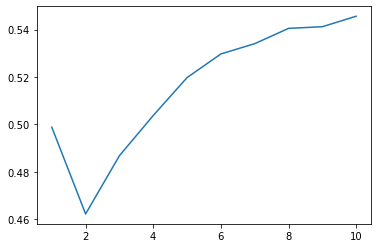

In [38]:
plt.plot(range(1, 11), scores)

In [39]:
vocab = vectorizer.vocabulary_

выберем K=8, потому что дальше изменения не очень существенные 

In [40]:
best_clf = KNeighborsClassifier(n_neighbors=8, metric='cosine')
best_clf.fit(X_train, train_target)

KNeighborsClassifier(metric='cosine', n_neighbors=8)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [41]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [45]:
test_data = newsgroups['data']

vectorizer_new = TfidfVectorizer(vocabulary=vocab)
X_test = vectorizer_new.fit_transform(test_data).toarray()

In [46]:
X_test.shape

(7532, 5000)

In [47]:
pred = best_clf.predict(X_test)

In [48]:
target = newsgroups['target']

In [49]:
accuracy_score(target, pred)

0.5351832182687202

Качество примерно такое же, как на кросс-валидации, что было бы хорошо, если бы качество на кросс-валидации было нормальным...

Что можно улучшить: поменять параметр max_features на побольше, ибо вероятно, что 5/100 тысяч слов брать мало, но с этим есть две проблемы:
1) огромная размерность, мне кажется от такой даже косинусное расстояние не спасет

2) долго работает (у меня еще и компьютер суперстарый, так что вообще всё грустно)